In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
from tensorflow.keras.initializers import random_uniform, glorot_uniform, constant, identity
from tensorflow.keras.layers import Dropout, Input, Add, Dense, Activation, BatchNormalization, Flatten, Conv2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Model, load_model

In [ ]:
path = Path("/content/drive/MyDrive/UTKFace")
filenames = list(map(lambda x: x.name, path.glob('*.jpg')))

In [ ]:
print(len(filenames))
print(filenames[:3])

23728
['78_0_0_20170112224707532.jpg.chip.jpg', '9_0_1_20170117195501575.jpg.chip.jpg', '9_0_0_20170110223500322.jpg.chip.jpg']


In [ ]:
np.random.seed(10)
np.random.shuffle(filenames)

age_labels, gender_labels, image_path = [], [], []

for filename in filenames:
    image_path.append(filename)
    temp = filename.split('_')
    age_labels.append(temp[0])
    gender_labels.append(temp[1])

In [ ]:
image_path

['39_0_1_20170113135726002.jpg.chip.jpg',
 '27_0_0_20170116205629794.jpg.chip.jpg',
 '66_1_0_20170110122914995.jpg.chip.jpg',
 '30_1_0_20170117092552049.jpg.chip.jpg',
 '86_1_0_20170110180113129.jpg.chip.jpg',
 '12_0_3_20170104013451506.jpg.chip.jpg',
 '18_0_2_20170110231202841.jpg.chip.jpg',
 '39_1_1_20170116225010927.jpg.chip.jpg',
 '21_1_1_20170112231854926.jpg.chip.jpg',
 '76_0_2_20170112204914106.jpg.chip.jpg',
 '15_1_4_20170103234910356.jpg.chip.jpg',
 '96_1_0_20170110182019881.jpg.chip.jpg',
 '21_1_3_20170117141517632.jpg.chip.jpg',
 '34_0_0_20170117171532466.jpg.chip.jpg',
 '29_1_1_20170116000522670.jpg.chip.jpg',
 '25_1_0_20170117143909681.jpg.chip.jpg',
 '30_1_2_20170116191207397.jpg.chip.jpg',
 '1_1_4_20161221201846817.jpg.chip.jpg',
 '27_1_4_20170103223631359.jpg.chip.jpg',
 '6_1_0_20170109193722375.jpg.chip.jpg',
 '1_0_2_20161219151026723.jpg.chip.jpg',
 '26_0_3_20170119172209840.jpg.chip.jpg',
 '26_1_1_20170116164012804.jpg.chip.jpg',
 '30_0_0_20170116215546940.jpg.chip.j

In [ ]:
df = pd.DataFrame()
df['image'], df['age'], df['gender'] = image_path, age_labels, gender_labels

In [ ]:
df.head()

,image,age,gender
0,39_0_1_20170113135726002.jpg.chip.jpg,39,0
1,27_0_0_20170116205629794.jpg.chip.jpg,27,0
2,66_1_0_20170110122914995.jpg.chip.jpg,66,1
3,30_1_0_20170117092552049.jpg.chip.jpg,30,1
4,86_1_0_20170110180113129.jpg.chip.jpg,86,1


In [ ]:
gender_dict = {0:"Male",1:"Female"}

In [ ]:
df = df.astype({'age':'float32', 'gender': 'int32'})

In [ ]:
print(df.dtypes)

image      object
age       float32
gender      int32
dtype: object


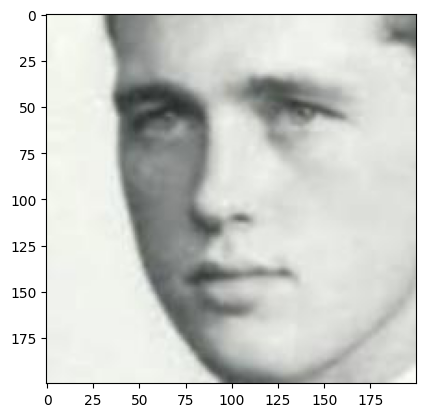

In [ ]:
from PIL import Image
#img = Image.open('/content/drive/MyDrive/UTKFace')
img = Image.open('/content/drive/MyDrive/UTKFace' + '/' + df.image[1])
plt.imshow(img)

<ipython-input-12-36725a16e635>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.age)


<Axes: xlabel='age', ylabel='Density'>

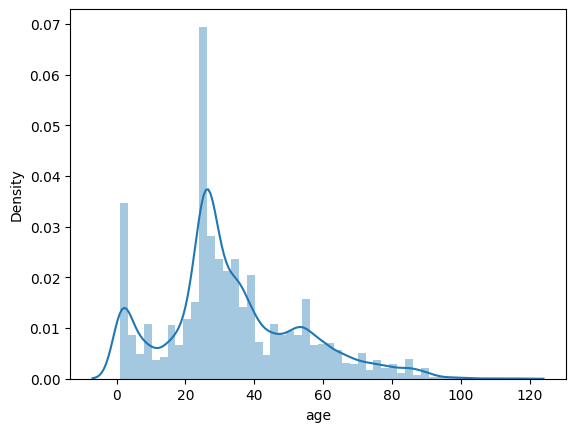

In [ ]:
sns.distplot(df.age)

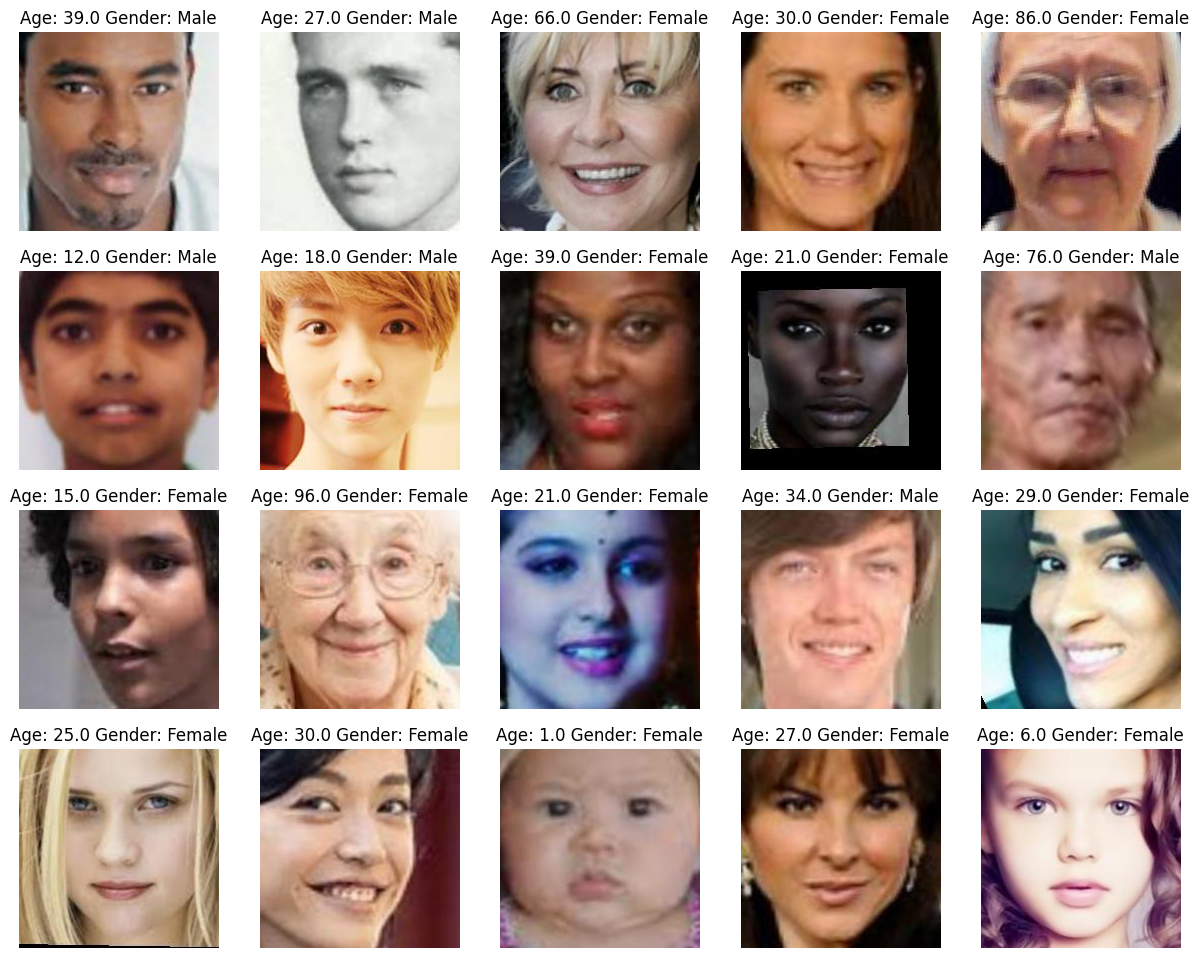

In [ ]:
files = df.iloc[0:20]
plt.figure(figsize=(15,15))
for index, file, age, gender in files.itertuples():
    plt.subplot(5,5, index+1)
    img = load_img("/content/drive/MyDrive/UTKFace/"+file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Age: {age} Gender: {gender_dict[gender]}")
    plt.axis('off')

In [ ]:
train, test = train_test_split(df, test_size=0.85, random_state=42)

In [ ]:
train.head()

,image,age,gender
1673,24_1_3_20170104223156607.jpg.chip.jpg,24.0,1
10293,85_1_0_20170110181953748.jpg.chip.jpg,85.0,1
4213,30_0_1_20170117140615401.jpg.chip.jpg,30.0,0
7480,42_0_0_20170117185621339.jpg.chip.jpg,42.0,0
17932,6_0_4_20161221202547897.jpg.chip.jpg,6.0,0


In [ ]:
#converting Image to numpy array (extracting feature)
x_train = []
for file in train.image:
    img = load_img("/content/drive/MyDrive/UTKFace/"+file, grayscale=True)
    img = img.resize((128,128), Image.ANTIALIAS)
    img = np.array(img)
    x_train.append(img)

x_train = np.array(x_train)

x_train = x_train.reshape(len(x_train), 128,128,1)

/usr/local/lib/python3.9/dist-packages/keras/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


In [ ]:
x_train.shape

(3559, 128, 128, 1)

In [ ]:
x_train = x_train/255

In [ ]:
y_gender = np.array(train.gender)
y_age = np.array(train.age)

In [ ]:
input_size = (128,128,1)

In [ ]:
inputs = Input((input_size))
X = Conv2D(64, (3, 3), activation='relu', kernel_initializer = glorot_uniform(seed=0))(inputs)
X = BatchNormalization(axis = 3)(X)
X = MaxPooling2D((3, 3))(X)

X = Conv2D(128, (3, 3), activation='relu')(X)
X = MaxPooling2D((2, 2), strides=(2, 2))(X)

X = Conv2D(256, (3, 3), activation='relu')(X)
X = MaxPooling2D((2, 2))(X)

X = Flatten()(X)

dense_1 = Dense(256, activation='relu')(X)
dense_2 = Dense(256, activation='relu' )(X)
dense_3 = Dense(128, activation='relu' )(dense_2)
dropout_1 = Dropout(0.4)(dense_1)
dropout_2 = Dropout(0.4)(dense_3)
output_1 = Dense(1,activation='sigmoid', name='gender_output')(dropout_1)
output_2 = Dense(1, activation='relu', name='age_output')(dropout_2)

model = Model(inputs=[inputs], outputs=[output_1,output_2])

In [ ]:
model.compile(loss=['binary_crossentropy','mae'], optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 126, 126, 64  640         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 126, 126, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
model_history = model.fit(x=x_train, y=[y_gender, y_age], batch_size = 10, epochs=5, validation_split= 0.1)

Epoch 1/5
321/321 [==============================] - 217s 675ms/step - loss: 13.3151 - gender_output_loss: 0.5142 - age_output_loss: 12.8009 - gender_output_accuracy: 0.7468 - age_output_accuracy: 0.0331 - val_loss: 17.2842 - val_gender_output_loss: 0.5218 - val_age_output_loss: 16.7623 - val_gender_output_accuracy: 0.7331 - val_age_output_accuracy: 0.0337
Epoch 2/5
321/321 [==============================] - 218s 679ms/step - loss: 11.6707 - gender_output_loss: 0.4312 - age_output_loss: 11.2395 - gender_output_accuracy: 0.8096 - age_output_accuracy: 0.0159 - val_loss: 20.3138 - val_gender_output_loss: 0.5158 - val_age_output_loss: 19.7980 - val_gender_output_accuracy: 0.7556 - val_age_output_accuracy: 0.0365
Epoch 3/5
321/321 [==============================] - 212s 661ms/step - loss: 11.1419 - gender_output_loss: 0.3841 - age_output_loss: 10.7577 - gender_output_accuracy: 0.8205 - age_output_accuracy: 0.0109 - val_loss: 14.2735 - val_gender_output_loss: 0.4455 - val_age_output_loss: 13

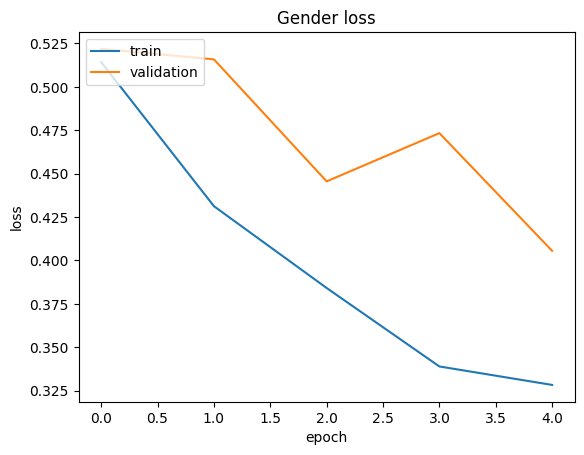

In [ ]:
plt.plot(model_history.history['gender_output_loss'])
plt.plot(model_history.history['val_gender_output_loss'])
plt.title('Gender loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

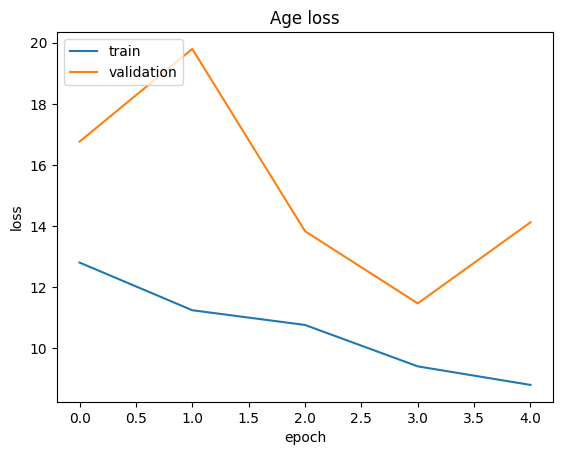

In [ ]:
plt.plot(model_history.history['age_output_loss'])
plt.plot(model_history.history['val_age_output_loss'])
plt.title('Age loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 175ms/step
Prediction: Gender =  Male  Age =  21


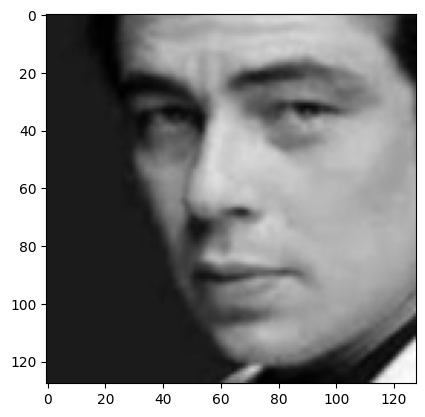

In [ ]:
index=170

pred = model.predict(x_train[index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])] 
pred_age = round(pred[1][0][0])

print("Prediction: Gender = ", pred_gender," Age = ", pred_age)
plt.imshow(x_train[index].reshape(128,128), cmap='gray')